## **NAME: OBBA MARK CALVIN**

## **REGNO:S23B23/047**
## **ACCESSNO: B24277**

In [1]:
#importing necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib


In [2]:
!pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\UNETS
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\UNETS
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\UNETS
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\UNETS
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\UNETS
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Data loading and inspection

Load the `data.csv` file into a pandas DataFrame and display basic information about the data, such as the first few rows, column names, and data types.


**Reasoning**:
Import pandas, load the data, and display basic information as requested in the instructions.



In [3]:

df = pd.read_csv('data.csv')
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.shape

(5842, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


# **Data Sourcing**

## Research questions
1. What is the overall sentiment distribution in the financial text data?

2. Are there specific keywords or phrases strongly associated with positive, negative, or neutral sentiment?

3. Can we build a model that accurately predicts the sentiment of a financial sentence?

4. How does the length of a sentence relate to its sentiment?"
            





## Data preprocessing


I cleaned and preprocessed the text data for sentiment analysis. This may involve tasks such as removing special characters, punctuation, stop words, and performing tokenization and stemming or lemmatization.


In [ ]:
import re
import nltk
import spacy
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)  # This is the key fix for the LookupError



# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# 1. Remove special characters (keeping only letters and spaces)
df['cleaned_sentence'] = df['Sentence'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text))

# 2. Convert to lowercase
df['cleaned_sentence'] = df['cleaned_sentence'].str.lower()

# 3. Tokenize the cleaned and lowercased text
df['tokens'] = df['cleaned_sentence'].apply(nltk.word_tokenize)

# 4. Remove stop words from the tokenized text
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# 5. Apply stemming to the filtered tokens
df['stemmed_tokens'] = df['filtered_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# 6. Join the processed tokens back into strings
df['preprocessed_sentence'] = df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Display the result
display(df[['Sentence', 'preprocessed_sentence']].head())

,Sentence,preprocessed_sentence
0,The GeoSolutions technology will leverage Bene...,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sale doubl eurm eu...
3,According to the Finnish-Russian Chamber of Co...,accord finnishrussian chamber commerc major co...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remain percent stake ...


## Exploratory Data Analysis (EDA)


Perform EDA on the preprocessed data to gain insights into the distribution of sentiments, frequently occurring words, and other relevant patterns to help answer the research questions.

In [12]:
#checking for missing data
df.isnull().sum()

Sentence                 0
Sentiment                0
cleaned_sentence         0
tokens                   0
filtered_tokens          0
stemmed_tokens           0
preprocessed_sentence    0
dtype: int64

In [13]:
#checking for duplicates
df.duplicated(subset=['Sentence', 'Sentiment', 'cleaned_sentence', 'preprocessed_sentence']).sum()

np.int64(6)

**Reasoning**:
Analyze the distribution of sentiments in the dataset and visualize it using a bar plot.

Sentiment Distribution:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


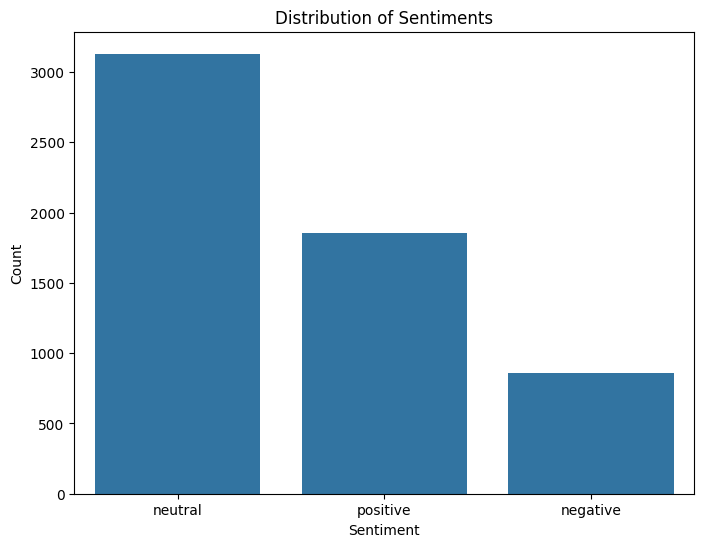

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()

print("Sentiment Distribution:")
print(sentiment_counts)

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Identify and visualize the most frequent words for each sentiment category.

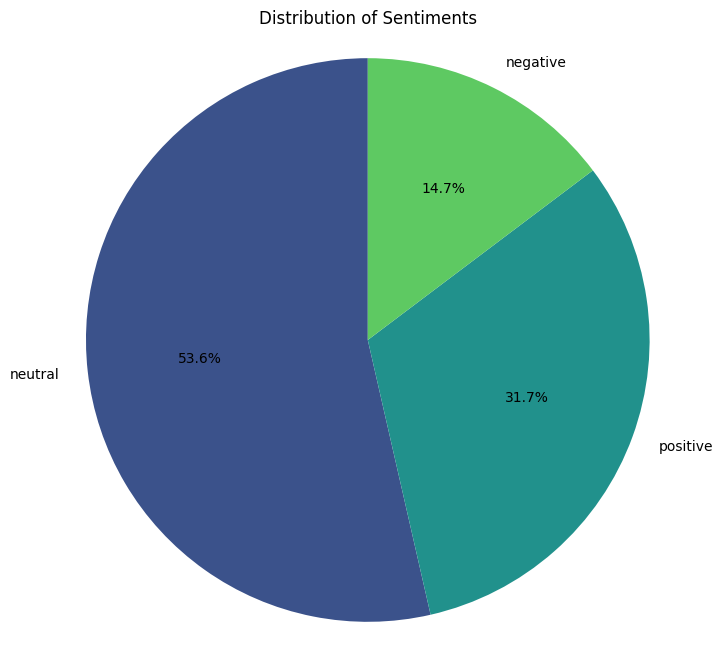

In [ ]:

# PIE CHART
# Visualize the sentiment distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(sentiment_counts)))
plt.title('Distribution of Sentiments')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart above visualizes the distribution of sentiments in the dataset. Each slice represents a sentiment category (neutral, positive, negative), and the size of the slice is proportional to the percentage of sentences belonging to that sentiment. This provides a clear overview of the sentiment balance in the data.

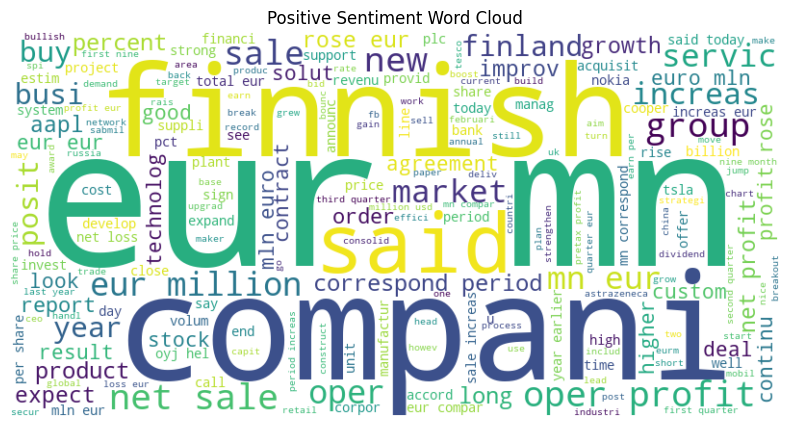

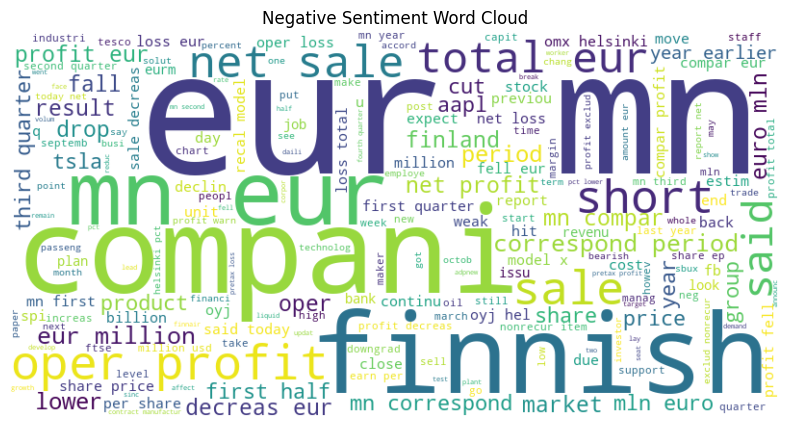

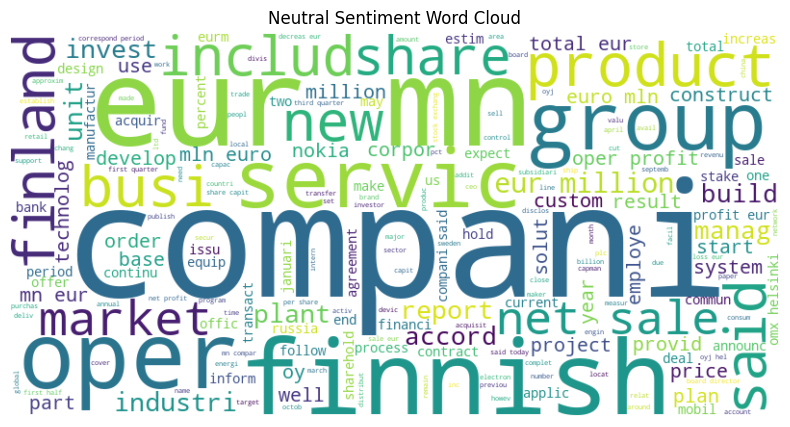

In [16]:
from wordcloud import WordCloud

def plot_word_cloud(text, title=None):
    """
    Generate and plot a word cloud.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

# Generate word clouds for each sentiment
positive_text = " ".join(df[df['Sentiment'] == 'positive']['preprocessed_sentence'])
negative_text = " ".join(df[df['Sentiment'] == 'negative']['preprocessed_sentence'])
neutral_text = " ".join(df[df['Sentiment'] == 'neutral']['preprocessed_sentence'])

plot_word_cloud(positive_text, title='Positive Sentiment Word Cloud')
plot_word_cloud(negative_text, title='Negative Sentiment Word Cloud')
plot_word_cloud(neutral_text, title='Neutral Sentiment Word Cloud')

The bigger the word the more positive sentiment

In [17]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a corpus.
    """
    words = [word for sentence in corpus for word in sentence.split()]
    return Counter(words).most_common(n)

# Get top words for each sentiment
positive_words = get_top_n_words(df[df['Sentiment'] == 'positive']['preprocessed_sentence'], 20)
negative_words = get_top_n_words(df[df['Sentiment'] == 'negative']['preprocessed_sentence'], 20)
neutral_words = get_top_n_words(df[df['Sentiment'] == 'neutral']['preprocessed_sentence'], 20)

print("\nTop 20 Positive Words:")
print(positive_words)

print("\nTop 20 Negative Words:")
print(negative_words)

print("\nTop 20 Neutral Words:")
print(neutral_words)

# You can further visualize these word frequencies if needed.


Top 20 Positive Words:
[('eur', 582), ('mn', 257), ('compani', 232), ('sale', 229), ('profit', 226), ('oper', 199), ('net', 197), ('said', 194), ('finnish', 178), ('increas', 171), ('year', 167), ('million', 164), ('period', 141), ('mln', 125), ('quarter', 116), ('share', 114), ('group', 104), ('new', 96), ('market', 96), ('rose', 92)]

Top 20 Negative Words:
[('eur', 376), ('mn', 233), ('profit', 161), ('sale', 109), ('oper', 106), ('net', 100), ('compani', 89), ('finnish', 89), ('period', 80), ('million', 79), ('quarter', 78), ('year', 76), ('loss', 76), ('share', 74), ('compar', 69), ('mln', 68), ('decreas', 67), ('said', 64), ('total', 63), ('first', 57)]

Top 20 Neutral Words:
[('eur', 669), ('compani', 596), ('share', 331), ('oper', 328), ('mn', 325), ('sale', 269), ('finnish', 261), ('said', 258), ('million', 251), ('finland', 223), ('profit', 218), ('market', 205), ('product', 204), ('net', 202), ('group', 200), ('servic', 196), ('total', 188), ('busi', 186), ('new', 164), ('i

**Reasoning**:
Explore the relationship between sentence length and sentiment.

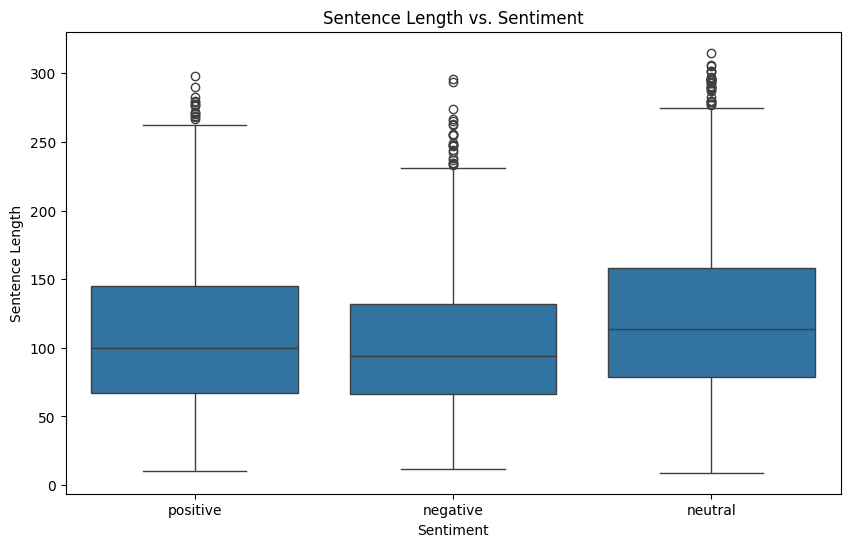


Average Sentence Length by Sentiment:
Sentiment
negative    105.330233
neutral     123.113419
positive    112.157127
Name: sentence_length, dtype: float64


In [18]:
# Add a column for sentence length (using the original sentence)
df['sentence_length'] = df['Sentence'].apply(len)

# Visualize the relationship between sentence length and sentiment using box plots or histograms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='sentence_length', data=df)
plt.title('Sentence Length vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentence Length')
plt.show()

# You can also look at the average sentence length for each sentiment
average_length_by_sentiment = df.groupby('Sentiment')['sentence_length'].mean()
print("\nAverage Sentence Length by Sentiment:")
print(average_length_by_sentiment)

## Sentiment Classification Model Selection and Training


Choose an appropriate sentiment classification model (e.g., Naive Bayes, SVM, Logistic Regression)but for this case is Logistic Regression and train it on the preprocessed data.

**Reasoning**:
Split the data into training and testing sets, convert the text data into numerical features using TF-IDF, and then train a Logistic Regression model for sentiment classification.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target (y)
X = df['preprocessed_sentence']
y = df['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Model Evaluation


Evaluate the performance of the trained sentiment classification model using appropriate metrics such as accuracy, precision, recall, and F1-score.

**Reasoning**:
Evaluate the performance of the trained Logistic Regression model on the testing data using accuracy and a classification report.

In [20]:
# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"f1 Score: {f1:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.7117
f1 Score: 0.6821

Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.15      0.23       175
     neutral       0.71      0.89      0.79       622
    positive       0.76      0.67      0.71       372

    accuracy                           0.71      1169
   macro avg       0.65      0.57      0.58      1169
weighted avg       0.69      0.71      0.68      1169

